# Estadistica Aplicada

1er parcial

Bárbara Govea Serna 1902869

Grupo 42

## Librerias

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Base de datos Peliculas

In [64]:
peliculas = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/peliculas.csv')
peliculas.head()

,title,description,release_year,rental_rate,length,rating,special_features,category
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror
2,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror
4,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,2.99,130,G,Deleted Scenes,Family


In [85]:
# Verificamos que hay valores NaN en nuestra base de datos
peliculas.isnull().values.any()
# Rellenamos por NA
peliculas.fillna('NA',inplace=True)
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1000 non-null   object 
 1   description       1000 non-null   object 
 2   release_year      1000 non-null   int64  
 3   rental_rate       1000 non-null   float64
 4   length            1000 non-null   int64  
 5   rating            1000 non-null   object 
 6   special_features  1000 non-null   object 
 7   category          1000 non-null   object 
 8   clasificación     1000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB


### a. ¿Cuantas  películas  hay,  cuantos  géneros,  y  cuanto  duran  en  promedio  las películas?

In [86]:
total_peliculas = peliculas['title'].count()
total_generos = peliculas['category'].nunique()
prom_duracion = peliculas['length'].mean().round(2)
print(f'Hay un total de {total_peliculas} peliculas\nUn total de {total_generos} generos\nY en promedio las peliculas duran {prom_duracion} minutos')

Hay un total de 1000 peliculas
Un total de 17 generos
Y en promedio las peliculas duran 115.27 minutos


### b) Crea un dataframe llamado películas_dormir con las películas que tienen una duración superior a 2 horas y sean documentales

In [68]:
peliculas_dormir = peliculas.query('length>120 & category=="Documentary"')
peliculas_dormir.head()

,title,description,release_year,rental_rate,length,rating,special_features,category
39,Army Flintstones,A Boring Saga of a Database Administrator And ...,2006,0.99,148,R,"Trailers,Commentaries",Documentary
57,Beach Heartbreakers,A Fateful Display of a Womanizer And a Mad Sci...,2006,2.99,122,G,"Deleted Scenes,Behind the Scenes",Documentary
128,Cause Date,A Taut Tale of a Explorer And a Pastry Chef wh...,2006,2.99,179,R,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary
141,Chicken Hellfighters,A Emotional Drama of a Dog And a Explorer who ...,2006,0.99,122,PG,"Trailers,Commentaries,Deleted Scenes,Behind th...",Documentary
155,Clerks Angels,A Thrilling Display of a Sumo Wrestler And a G...,2006,4.99,164,G,Commentaries,Documentary


### c) Contar cuántas películas de cada género existen
### d) Calcular la duración promedio de las películas de cada género.


In [69]:
peliculas_xgenero = pd.DataFrame(peliculas.groupby('category')['length'].agg(['count','mean'])).round(2).rename(columns={'count':'cantidad','mean':'duración promedio'})
peliculas_xgenero

,cantidad,duración promedio
category,,
Action,64,111.61
Animation,66,111.02
Children,60,109.80
Classics,57,111.67
Comedy,58,115.83
Documentary,68,108.75
Drama,61,119.89
Family,69,114.78
Foreign,73,121.70


### e) Crear una nueva columna que indique si una película es "Corta" (duración menor a 1.5 horas), "Normal" (entre 1.5 y 2.5 horas) o "Larga" (mayor a 2.5 horas)


In [70]:
condiciones = [peliculas['length']<90, peliculas['length']<=150,peliculas['length']>150]
opciones = ['Corta','Normal','Larga']
peliculas['clasificación'] = np.select(condiciones,opciones,'No aplica')  
peliculas[['title','length','clasificación']]

,title,length,clasificación
0,Academy Dinosaur,86,Corta
1,Ace Goldfinger,48,Corta
2,Adaptation Holes,50,Corta
3,Affair Prejudice,117,Normal
4,African Egg,130,Normal
...,...,...,...
995,Young Language,183,Larga
996,Youth Kick,179,Larga
997,Zhivago Core,105,Normal
998,Zoolander Fiction,101,Normal


## 2. Base de datos del país Asgard

In [71]:
asgard = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/poblacion_Asgard.csv')
asgard.head()

,País,Estado,Municipio,Población
0,Asgard,Pandora,Reino Tierra,377896
1,Asgard,Alderaan,Fuente Dorada,49984
2,Asgard,Genosha,El Carmen,303918
3,Asgard,Naboo,Omashu,265712
4,Asgard,Mordor,Don Bosco,121151


### a) Ordena la base alfabéticamente por estado y por municipio

In [72]:
asgard = asgard.sort_values(['Estado','Municipio'],ascending=True)
print(asgard)

      País    Estado       Municipio  Población
16  Asgard  Alderaan     Ciudad Jedi     130312
1   Asgard  Alderaan   Fuente Dorada      49984
31  Asgard  Alderaan        Luz azul     914910
76  Asgard  Alderaan          Madero     774290
46  Asgard  Alderaan      San Isidro     159338
..     ...       ...             ...        ...
8   Asgard     Yaven       El Bosque     649663
83  Asgard     Yaven      Green Flag     380989
68  Asgard     Yaven     Santa María     111687
53  Asgard     Yaven     Villa Wendy     646914
38  Asgard     Yaven  Villa amarilla     274109

[90 rows x 4 columns]


### b) ¿Cuantos estados hay, cuantos municipios hay en cada estado y cuantos municipios hay en total?

In [73]:
pd.DataFrame(asgard.groupby('Estado')['Municipio'].count())

,Municipio
Estado,
Alderaan,6
Atlantis,6
Endor,6
Genosha,6
Gotham,6
Mandalore,6
Mordor,6
Mustafar,6
Naboo,6


In [74]:
total_estados = asgard['Estado'].nunique()
total_municipios = asgard['Municipio'].nunique()
print(f'Asgard tiene un total de {total_estados} estados, donde hay 6 municipios en cada uno\nExisten un total de {total_municipios} municipios')

Asgard tiene un total de 15 estados, donde hay 6 municipios en cada uno
Existen un total de 59 municipios


### c) Cuanta población tiene el país en total y cuanta población tiene cada estado


In [75]:
total_población = asgard['Población'].sum()
print(f'Asgard tiene una población total de {total_población} habitantes')

Asgard tiene una población total de 43114719 habitantes


In [76]:
pd.DataFrame(asgard.groupby('Estado')['Población'].sum())

,Población
Estado,
Alderaan,2283452
Atlantis,3779656
Endor,2427956
Genosha,2871584
Gotham,3204304
Mandalore,2044164
Mordor,3627119
Mustafar,2183880
Naboo,1602111


### d) Calcula la mediana de la población de los municipios, y clasifícalos, aquellos por arriba de la mediana deben llamarse “muy poblados” y aquellos debajo de la mediana “poco poblados”

In [77]:
mediana = asgard['Población'].median()
asgard['Clasificación x mediana'] = np.where(asgard['Población']>mediana,'Muy poblados','Poco poblados') 
asgard.head()

,País,Estado,Municipio,Población,Clasificación x mediana
16,Asgard,Alderaan,Ciudad Jedi,130312,Poco poblados
1,Asgard,Alderaan,Fuente Dorada,49984,Poco poblados
31,Asgard,Alderaan,Luz azul,914910,Muy poblados
76,Asgard,Alderaan,Madero,774290,Muy poblados
46,Asgard,Alderaan,San Isidro,159338,Poco poblados


### e) Encuentra los 5 municipios mas poblados y los cinco municipios menos poblados del país

In [78]:
municipios_mas_poblados = asgard.sort_values('Población',ascending=False).head(5)
municipios_mas_poblados

,País,Estado,Municipio,Población,Clasificación x mediana
34,Asgard,Mordor,Madripur,998079,Muy poblados
27,Asgard,Mustafar,Villa Norte,997107,Muy poblados
6,Asgard,Sokovia,La Unión,986067,Muy poblados
74,Asgard,Narnia,Gral Escobedo,974548,Muy poblados
79,Asgard,Mordor,Yellow town,974324,Muy poblados


In [79]:
municipios_menos_poblados = asgard.sort_values('Población',ascending=True).head(5)
municipios_menos_poblados

,País,Estado,Municipio,Población,Clasificación x mediana
17,Asgard,Genosha,Ciudad Jedi,13666,Poco poblados
14,Asgard,Narnia,Luz roja,14986,Poco poblados
39,Asgard,Endor,Villa rosa,25538,Poco poblados
26,Asgard,Mandalore,Shelbyville,31535,Poco poblados
85,Asgard,Gotham,Mar violeta,44585,Poco poblados


### f) El municipio más poblado de cada estado

In [80]:
posiciones_max = asgard.groupby('Estado')['Población'].idxmax()
estxmuni_mas_poblados = asgard.loc[posiciones_max,['Estado','Municipio','Población']].reset_index(drop = True)
estxmuni_mas_poblados

,Estado,Municipio,Población
0,Alderaan,Luz azul,914910
1,Atlantis,Mar amarillo,961061
2,Endor,Santa María,875371
3,Genosha,Villa Lannister,822654
4,Gotham,Playa Verde,918710
5,Mandalore,San Pedro,736716
6,Mordor,Madripur,998079
7,Mustafar,Villa Norte,997107
8,Naboo,Luz azul,602661
9,Narnia,Gral Escobedo,974548


## 3. Gráficos de barras en base a 2

### a) Los 15 municipios más poblados de Asgard

In [81]:
estxmuni_mas_poblados = estxmuni_mas_poblados.loc[:,['Población','Municipio']].set_index('Municipio').sort_values('Población',ascending=False)
estxmuni_mas_poblados

,Población
Municipio,
Madripur,998079
Villa Norte,997107
La Unión,986067
Gral Escobedo,974548
Villa Demogorgon,969140
Mar amarillo,961061
Villa Marlon,925414
Playa Verde,918710
Luz azul,914910


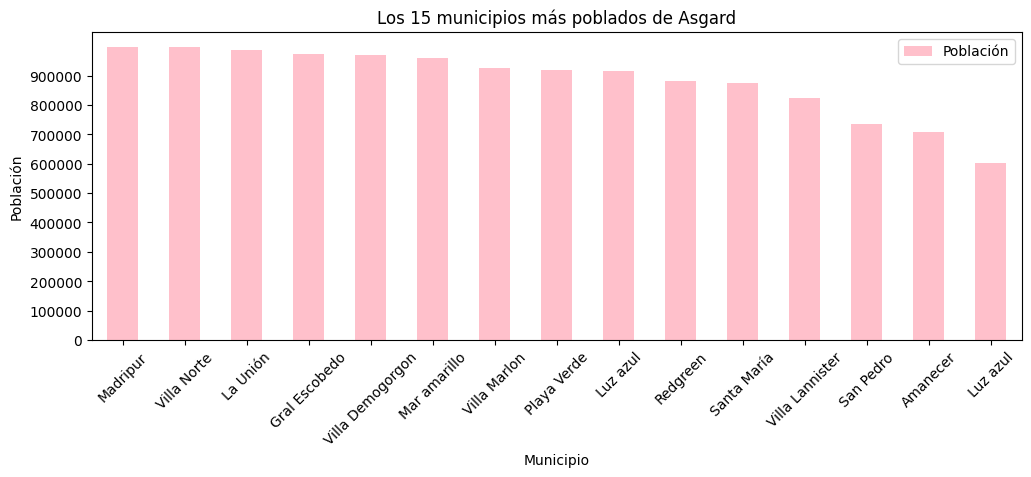

In [82]:
estxmuni_mas_poblados.plot(kind = 'bar',width=.5,figsize=(12,4),color='pink')
plt.title('Los 15 municipios más poblados de Asgard')
plt.tick_params(axis='x', labelrotation=45)
plt.yticks(np.arange(0, 1000000, 100000))
plt.ylabel('Población')
plt.show()

### b) Cuantas peliculas hay de cada género

In [83]:
peliculas_xgenero = pd.DataFrame(peliculas_xgenero.loc[:,'cantidad']).sort_values('cantidad',ascending=False)
peliculas_xgenero

,cantidad
category,
Foreign,73
Sports,73
Family,69
Documentary,68
Animation,66
Action,64
New,63
Drama,61
Games,61


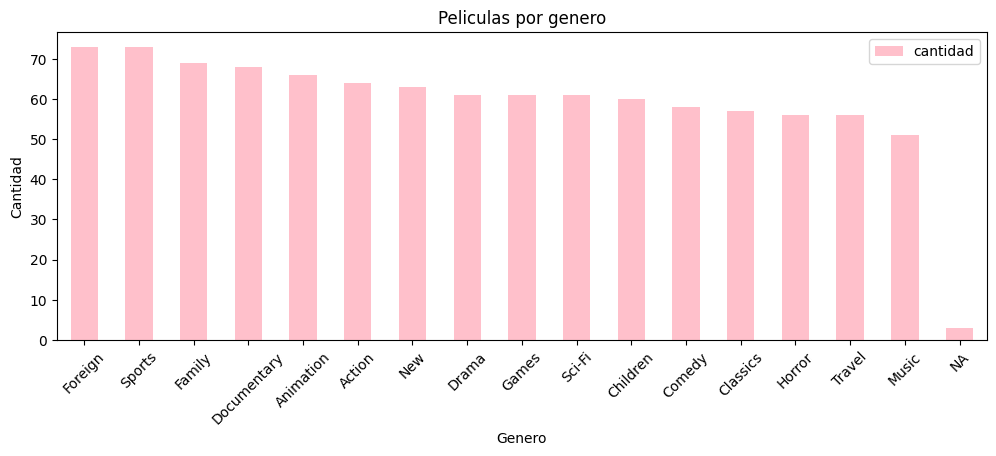

In [84]:
peliculas_xgenero.plot(kind = 'bar',width=.5,figsize=(12,4),color='pink')
plt.title('Peliculas por genero')
plt.tick_params(axis='x', labelrotation=45)
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.show()